# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)

# Fetch current ETH price
etc_response_data = requests.get(eth_url)
etc_response_data 

<Response [200]>

In [6]:
# Compute current value of my BTC cyrpto
## Display BTC response data
btc_response_data = requests.get(btc_url).json()
btc_response_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18945725,
   'total_supply': 18945725,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 38341.0,
     'volume_24h': 17621211627,
     'market_cap': 727059721129,
     'percentage_change_1h': -0.689083775261503,
     'percentage_change_24h': 2.84261243810817,
     'percentage_change_7d': 4.26042309272218,
     'percent_change_1h': -0.689083775261503,
     'percent_change_24h': 2.84261243810817,
     'percent_change_7d': 4.26042309272218},
    'CAD': {'price': 48593.3834,
     'volume_24h': 22333123616.0598,
     'market_cap': 921475490558.895,
     'percent_change_1h': -0.689083775261503,
     'percent_change_24h': 2.84261243810817,
     'percent_change_7d': 4.26042309272218}},
   'last_updated': 1643709467}},
 'metadata': {'timestamp': 1643709467,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [7]:
# Compute current value of my BTC cyrpto
## Display BTC response data
eth_response_data = requests.get(eth_url).json()
eth_response_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 119398960,
   'total_supply': 119398960,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2742.63,
     'volume_24h': 13810373974,
     'market_cap': 328064343096,
     'percentage_change_1h': -0.537745741249809,
     'percentage_change_24h': 8.16274255722476,
     'percentage_change_7d': 12.043347145461,
     'percent_change_1h': -0.537745741249809,
     'percent_change_24h': 8.16274255722476,
     'percent_change_7d': 12.043347145461},
    'CAD': {'price': 3476.009262,
     'volume_24h': 17503267974.6476,
     'market_cap': 415788748439.87,
     'percent_change_1h': -0.537745741249809,
     'percent_change_24h': 8.16274255722476,
     'percent_change_7d': 12.043347145461}},
   'last_updated': 1643709511}},
 'metadata': {'timestamp': 1643709511,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [8]:
# Extracting my BTC value from btc_response_data
btc_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_value)

48593.3834


In [9]:
# Extracting my ETH value from eth_response_data
eth_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_value)

3476.009262


In [10]:
# Calculating my btc and eth value
## Printing current crypto wallet balance
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58312.06
The current value of your 5.3 ETH is $18422.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares and bonds
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Confirm the keys
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [13]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [14]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [15]:
# Get current closing prices for SPY and AGG
## (use a limit=1000 parameter to call the most recent 1000 days of data)

my_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Preview DataFrame
my_portfolio.head()

AGG                                         SPY  \
                             open    high       low   close   volume     open   
time                                                                            
2021-02-01 00:00:00-05:00  117.20  117.26  117.0915  117.21  5469814  373.720   
2021-02-02 00:00:00-05:00  116.99  117.09  116.9700  117.05  4694446  379.650   
2021-02-03 00:00:00-05:00  116.97  116.99  116.8700  116.89  5060310  382.435   
2021-02-04 00:00:00-05:00  116.75  116.89  116.6900  116.86  5128808  382.960   
2021-02-05 00:00:00-05:00  116.91  116.96  116.7000  116.72  3230833  388.200   

                                                               
                             high       low   close    volume  
time                                                           
2021-02-01 00:00:00-05:00  377.34  370.3760  376.18  64056510  
2021-02-02 00:00:00-05:00  383.22  376.3181  381.54  53979346  
2021-02-03 00:00:00-05:00  383.70  380.4800  381.86  43305661  
2021-02-04 00:00:00-05:00  386.24  381.9655  386.17  40030930  
2021-02-05 00:00:00-05:00  388.47  386.1444  387.68  39312522

In [16]:
# Pick AGG close prices
agg_close = my_portfolio["AGG"].iloc[1]
agg_close_price = agg_close["close"]
agg_close_price

117.05

In [17]:
# Pick SPY close prices
spy_close = my_portfolio["SPY"].iloc[1]
spy_close_price = spy_close["close"]
spy_close_price

381.54

In [18]:
#Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.05
Current SPY closing price: $381.54


In [19]:
# Calculating my AGG and SPY value
## Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19077.00
The current value of your 200 AGG shares is $23410.00


### Savings Health Analysis

In [20]:
# Setting monthly household income
monthly_income = 12000

# Defining BTC and ETH total values
total_eth_value = my_eth * my_eth_value
total_btc_value = my_btc * my_btc_value

# Consolidate financial assets data
shares = my_agg_value + my_spy_value
crypto = total_btc_value + total_eth_value

# Printing as part of check of shares and crypto amounts
print(f"Shares amount = ${shares:0.2f}")
print(f"Crypto amount = ${crypto:0.2f}")

Shares amount = $42487.00
Crypto amount = $167615.57


In [21]:
# Creating savings DataFrame this is called df_savings
## Indexing crypto and shares 
data = {"amount": [73831.01,42487.00]}
df = pd.DataFrame(data, index = ["crypto","shares"])
df_savings = pd.DataFrame(df)

# Display savings DataFrame
display(df_savings)

amount
crypto  73831.01
shares  42487.00

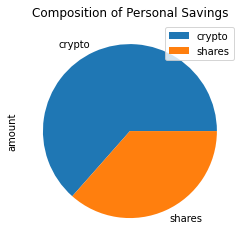

In [22]:
# Plot df_savings pie chart
save_plt = df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [23]:
# Set ideal emergency fund
## Print emergency fund amount
emergency_fund = monthly_income * 3
emergency_fund

36000

In [24]:
# Defining shares and crypto savings amount
## Calculate total amount of shares and crypto savings as total_savings
shares_save = df_savings["amount"].iloc[0]
crypto_save = df_savings["amount"].iloc[1]

total_savings = shares_save + crypto_save
total_savings

116318.01

In [25]:
# Find the difference between emergency_fund and total_savings for health check validation
difference = total_savings - emergency_fund
difference

80318.01

In [26]:
# Validate saving health
## Utilising if statement to conduct saving health with an output
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
elif (total_savings == emergency_fund):
    print("Congratulations! You have reached your financial goal.")
else:
    print("You are $" + {difference} +"away from your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
## (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
## Weights are assigned 60% stocks = SPY and 40% bonds = AGG
### Weights = AGG,SPY ratio
mc_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30)

In [30]:
# Printing the mc_even_dist simulation input data
mc_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ddout\Desktop\FinTech\Unit 5 Homework - Financial Planning\Unit-5-Financial-Planning-Dottie-Doutre\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1          2          3         4         5    \
0      1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1      1.002956  0.994106   0.986388   0.993165  0.996848  0.988744   
2      1.000124  0.989737   0.995318   0.990394  0.996089  0.996051   
3      1.005473  0.994618   1.005092   0.992743  0.991081  1.000372   
4      0.998791  1.005975   1.005352   0.991367  0.989438  0.999460   
...         ...       ...        ...        ...       ...       ...   
7556  35.498803  5.123264  11.376059  38.859625  9.766690  7.123608   
7557  35.806111  5.103012  11.395590  38.895591  9.789846  7.194266   
7558  35.942093  5.171245  11.278920  38.783903  9.808988  7.158181   
7559  35.767368  5.212473  11.189825  39.325916  9.616264  7.233261   
7560  35.489365  5.216881  11.155197  38.783064  9.619475  7.218482   

            6         7          8          9    ...        490       491  \
0      1.000000  1.000000   1.000000   1.000000  ...   1.000000  1.000000   
1      1.012770  1.003370   0.986944   0.992341  ...   0.997174  0.986634   
2      0.997094  0.998540   0.994606   0.983480  ...   0.993765  0.974077   
3      0.999029  0.996070   0.988801   0.982360  ...   0.986687  0.976584   
4      0.989750  0.988470   0.996927   0.983679  ...   0.985275  0.980803   
...         ...       ...        ...        ...  ...        ...       ...   
7556  37.103839  4.237961  62.703490  30.815319  ...  17.723658  4.379874   
7557  37.353828  4.298096  62.488772  31.321981  ...  17.772005  4.388715   
7558  37.328719  4.329359  63.330563  30.977689  ...  17.704128  4.392622   
7559  37.535759  4.292714  62.833992  30.922218  ...  17.814227  4.364803   
7560  37.572630  4.318331  63.847965  30.914009  ...  17.643536  4.391559   

            492        493        494       495       496        497  \
0      1.000000   1.000000   1.000000  1.000000  1.000000   1.000000   
1      0.986338   0.992370   0.995999  1.011103  0.996443   1.003541   
2      0.994269   0.986883   0.994813  1.008021  1.008890   1.005148   
3      1.000678   0.983879   0.999331  1.021913  0.990132   1.015063   
4      1.023110   0.976455   1.005865  1.018303  0.988628   1.023954   
...         ...        ...        ...       ...       ...        ...   
7556  19.648322  26.336874  12.462728  5.336587  9.124635  14.933634   
7557  20.019879  26.461494  12.695396  5.399207  9.215218  14.990888   
7558  20.227039  26.564550  12.579827  5.491006  9.147886  14.967923   
7559  20.016083  26.952485  12.614325  5.497654  9.197830  14.929359   
7560  19.794246  27.076689  12.654460  5.457251  9.310753  15.033687   

            498       499  
0      1.000000  1.000000  
1      1.003596  0.997997  
2      1.015682  0.998210  
3      1.009395  1.014402  
4      1.002055  1.021982  
...         ...       ...  
7556  10.747721  7.721001  
7557  10.787709  7.681798  
7558  10.861133  7.709650  
7559  10.755857  7.770325  
7560  10.850501  7.749867  

[7561 rows x 500 columns]

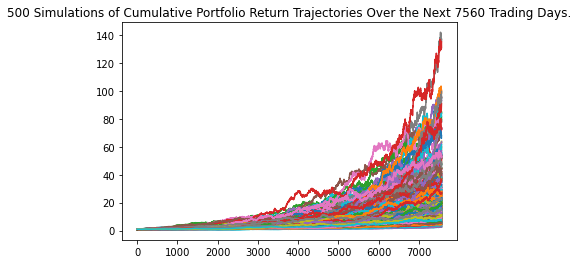

In [32]:
# Plot simulation outcomes for mc_even_dist
mc_even_line_plot = mc_even_dist.plot_simulation()

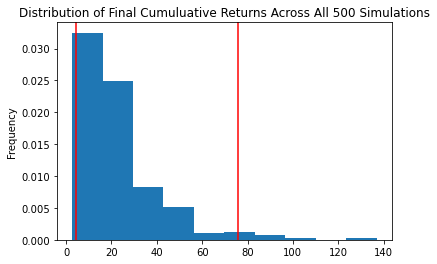

In [33]:
# Plot probability distribution and confidence intervals fro mc_even_dist
mc_even_dist_plot = mc_even_dist.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_even_tbl = mc_even_dist.summarize_cumulative_return()

# Print summary statistics
print(mc_even_tbl)

count           500.000000
mean             23.357733
std              18.503579
min               2.664171
25%              11.587669
50%              18.033484
75%              28.213180
max             136.905704
95% CI Lower      4.450065
95% CI Upper     75.710385
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(mc_even_tbl[8]*20000,2)
even_ci_upper = round(mc_even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89001.3 and $1514207.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
## This 50% increase investment plan is called incr_initial_investment
incr_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
incr_ci_lower = round(mc_even_tbl[8]*incr_initial_investment,2)
incr_ci_upper = round(mc_even_tbl[9]*incr_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${incr_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${incr_ci_lower} and ${incr_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133501.95 and $2271311.56


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
## Weights are assigned 80% stocks = SPY and 20% bonds = AGG
### Weights = AGG,SPY ratio
mc_even_dist_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_even_dist_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ddout\Desktop\FinTech\Unit 5 Homework - Financial Planning\Unit-5-Financial-Planning-Dottie-Doutre\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005125  0.985506  1.007113  0.978578  0.996963  0.996595  1.003951   
2     1.021910  0.991920  1.024952  0.967563  1.012946  1.005580  1.006076   
3     1.020742  1.008842  1.022637  0.966498  1.016041  1.003979  1.010847   
4     1.031335  1.026439  1.019627  0.955017  1.020198  1.007651  1.019666   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.176454  2.196964  1.936933  2.082291  1.180728  1.201225  1.080769   
1257  1.202575  2.225584  1.941926  2.057710  1.201911  1.202204  1.066491   
1258  1.183002  2.201708  1.935873  2.073353  1.188547  1.206324  1.064944   
1259  1.148274  2.186004  1.981042  2.057635  1.209862  1.182560  1.064885   
1260  1.153736  2.193517  1.986950  2.054669  1.186804  1.158245  1.066871   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998101  0.972497  0.998095  ...  1.017626  0.994658  1.004660   
2     0.990934  0.986710  0.999760  ...  1.008749  0.997882  0.986850   
3     0.979922  1.002111  0.992780  ...  1.009763  0.990297  0.989535   
4     0.978356  1.003835  1.006881  ...  1.031613  1.009894  0.996420   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.454641  2.126888  1.454302  ...  2.065219  1.931152  1.762358   
1257  1.454432  2.121479  1.432071  ...  2.082584  1.955401  1.738353   
1258  1.450621  2.111496  1.419566  ...  2.060650  1.967000  1.749795   
1259  1.427038  2.101723  1.423709  ...  2.045519  1.954272  1.759722   
1260  1.432922  2.087939  1.431270  ...  2.037188  1.962391  1.790530   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009295  1.005599  1.004602  1.018297  0.995761  1.004826  1.003062  
2     1.016029  1.006880  1.022066  1.026956  1.002007  1.021383  1.002129  
3     1.024518  1.014311  1.018466  1.036834  0.984815  1.029107  0.979944  
4     1.026954  1.008445  0.997932  1.044964  1.002002  1.035325  0.988112  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.899849  0.976323  1.219008  2.116129  0.980409  1.607590  1.059420  
1257  1.886594  0.976654  1.225777  2.092050  0.979308  1.605343  1.041509  
1258  1.883948  0.986898  1.218803  2.116352  0.979432  1.615216  1.057373  
1259  1.941157  0.996822  1.225391  2.096944  0.992311  1.603019  1.062413  
1260  1.890359  1.016646  1.260140  2.091355  1.024344  1.592119  1.054038  

[1261 rows x 500 columns]

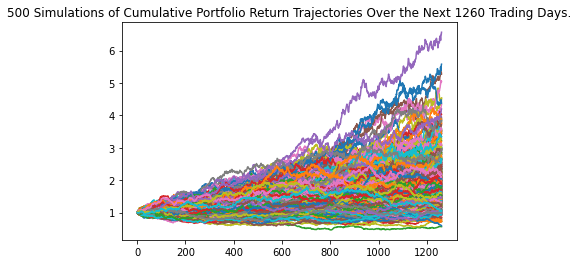

In [40]:
# Plot simulation outcomes for 5 year returns
even_five_year_plot = mc_even_dist_five_years.plot_simulation()

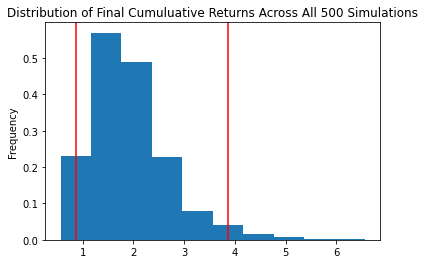

In [41]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = mc_even_dist_five_years.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summ = mc_even_dist_five_years.summarize_cumulative_return()

# Print summary statistics
print(five_year_summ)

count           500.000000
mean              1.933125
std               0.800233
min               0.564683
25%               1.368047
50%               1.786093
75%               2.326524
max               6.563796
95% CI Lower      0.867787
95% CI Upper      3.859603
Name: 1260, dtype: float64


In [43]:
# Setting initial investment for 5 year investment
five_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_summ[8]*five_initial_investment,2)
ci_upper_five = round(five_year_summ[9]*five_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17355.74 and $77192.05


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
## Weights are assigned 80% stocks = SPY and 20% bonds = AGG
### Weights = AGG,SPY ratio
mc_even_dist_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_even_dist_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ddout\Desktop\FinTech\Unit 5 Homework - Financial Planning\Unit-5-Financial-Planning-Dottie-Doutre\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997302  1.006053  0.994099  1.011333  0.989777  1.000429  1.007727   
2     0.997016  1.010679  0.996793  1.038683  0.983886  0.975626  1.005020   
3     0.984709  1.020069  0.988315  1.040864  0.991642  0.979720  0.987357   
4     0.981114  1.015743  0.994172  1.039230  0.990185  0.991611  0.983149   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.607308  3.676431  4.295109  2.793258  8.302385  2.409364  3.062535   
2517  2.616000  3.594969  4.340104  2.807095  8.333014  2.398970  3.154797   
2518  2.640391  3.610130  4.307324  2.805511  8.324519  2.374098  3.183343   
2519  2.626202  3.579875  4.317478  2.799621  8.503461  2.361879  3.235243   
2520  2.580718  3.539160  4.394102  2.853907  8.447780  2.361895  3.239371   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002280  0.985359  0.989994  ...  1.001463  0.976546  0.992317   
2     0.991377  0.996911  0.989062  ...  0.995289  0.986033  0.986581   
3     0.994684  1.006156  0.983058  ...  1.002327  0.981229  1.011872   
4     1.007945  0.998726  0.995891  ...  1.010888  0.969306  1.011178   
...        ...       ...       ...  ...       ...       ...       ...   
2516  5.867779  1.483762  3.206664  ...  2.497586  2.343198  5.291533   
2517  5.967146  1.502420  3.233500  ...  2.515773  2.340737  5.284035   
2518  5.935086  1.509075  3.243912  ...  2.470008  2.354116  5.272328   
2519  5.936186  1.474545  3.259920  ...  2.462720  2.350360  5.216491   
2520  5.981554  1.444902  3.284269  ...  2.473840  2.353137  5.282883   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.011623  0.996600  1.009058  1.022536  0.991597  0.992387  1.014538  
2     1.032266  1.004477  1.015748  1.016537  1.017678  0.999227  1.022517  
3     1.019797  1.023800  1.023399  1.022330  1.021827  1.004392  1.033418  
4     1.001639  1.022935  1.026085  1.044994  1.039149  1.013687  0.999513  
...        ...       ...       ...       ...       ...       ...       ...  
2516  5.420263  4.616166  2.799638  3.063279  7.710197  3.498482  1.565545  
2517  5.423533  4.580949  2.754751  3.063964  7.704256  3.565085  1.580289  
2518  5.442530  4.658415  2.743167  3.079735  7.848767  3.567326  1.563042  
2519  5.404367  4.638527  2.767577  3.069243  7.821238  3.599308  1.590359  
2520  5.329213  4.634932  2.836984  3.102737  7.931746  3.568122  1.588584  

[2521 rows x 500 columns]

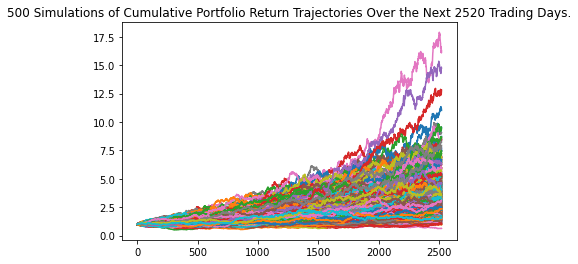

In [46]:
# Plot simulation outcomes for 10 year investment
even_ten_year_plot = mc_even_dist_ten_years.plot_simulation()

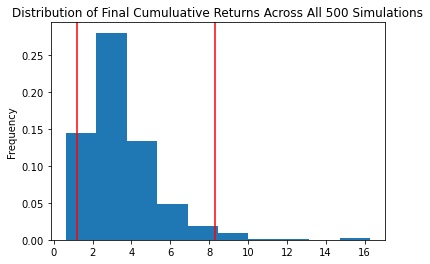

In [47]:
# Plot probability distribution and confidence intervals
ten_year_dist_plot = mc_even_dist_ten_years.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summ = mc_even_dist_ten_years.summarize_cumulative_return()

# Print summary statistics
print(ten_year_summ)

count           500.000000
mean              3.507756
std               1.881931
min               0.625532
25%               2.267259
50%               3.089810
75%               4.262960
max              16.287849
95% CI Lower      1.221517
95% CI Upper      8.295491
Name: 2520, dtype: float64


In [49]:
# Set initial investment
ten_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_summ[8]*ten_initial_investment,2)
ci_upper_ten = round(ten_year_summ[9]*ten_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24430.33 and $165909.82
